## **Project Title:** 
### "Leveraging Data Science for Predictive Monetary Insights: A Comprehensive Analysis of Risk, Fraud, and Customer Segmentation in the Canadian Banking Sector"**

### Created by:
## Olanrewaju Olajuyi
#### Date: 21st May 2024

In [4029]:
########################################################################################################################################################

### **A. Problem Statement:**
#### Canadian banks such as RBC, Scotiabank, TD Bank, and CIBC face issues in controlling financial risks, detecting fraud, and understanding customers behavior. This project will use data science to examine Kaggle's **Finance_data.csv** dataset to anticipate financial risks, detect fraud, and segment clients based on their financial patterns. The objective is to give insights that can improve risk management, fraud detection, and customer service in banking.


### **B. Descriptive Analytics: Understanding the Dataset**

#### 1. The dataset shows a balanced gender distribution and an average age of 27.8, indicating a younger, risk-tolerant demographic.
#### 2. Participants favor diversified investments like mutual funds, equities, and government bonds, with a preference for short-term (under 5 years) investments.
#### 3. Correlations suggest mutual fund investors are likely to invest in equities.
#### 4. Most participants monitor investments monthly to weekly, with expected returns of 20%-30%.
#### 5. The dataset is clean and prepared for predictive modeling, offering insights into investment behaviors.

#### Here’s a brief explanation for each of your columns based on their data types:

##### 1. age (float64): Continuous numerical data representing a person's age.
##### 2. Investment_Avenues (int64): Categorical data encoded as 0/1, indicating whether an investment avenue is chosen or not.
##### 3. Mutual_Funds (float64): Continuous numerical data representing an investment amount or preference in mutual funds.
##### 4. Equity_Market (float64): Continuous numerical data representing the amount or preference in the equity market.
##### 5. Debentures (float64): Continuous numerical data representing the investment in debentures.
##### 6. Government_Bonds (float64): Continuous numerical data representing the investment in government bonds.
##### 7. Fixed_Deposits (float64): Continuous numerical data representing the investment in fixed deposits.
##### 8. PPF (float64): Continuous numerical data representing the amount in Public Provident Fund (PPF).
##### 9. Gold (float64): Continuous numerical data representing the investment in gold.
##### 10. Stock_Market (int64): Categorical data encoded as 0/1, indicating whether a person is investing in the stock market.
##### 11. Factor (object): Categorical data describing the reason for investment (e.g., Returns, Locking Period, Risk).
##### 12. Objective (object): Categorical data describing the investment objective (e.g., Capital Appreciation, Income, Growth).
##### 13. Purpose (object): Categorical data describing the purpose of the investment (e.g., Wealth Creation, Savings for Future).
##### 14. Duration (int64): Categorical data representing the investment duration, encoded as integer values (e.g., 1-3 years, 3-5 years).
##### 15. Invest_Monitor (object): Categorical data describing how frequently the investment is monitored (e.g., Monthly, Weekly).
##### 16. Expect (object): Categorical data describing the expected returns (e.g., 20%-30%, 10%-20%).
##### 17. Avenue (object): Categorical data indicating the type of investment avenue (e.g., Mutual Fund, Equity).
##### 18. What are your savings objectives? (object): Categorical data describing the person's savings objective (e.g., Retirement Plan, Health Care).
##### 19. Reason_Equity (object): Categorical data explaining the reason for equity investment (e.g., Capital Appreciation, Liquidity).
##### 20. Reason_Mutual (object): Categorical data explaining the reason for mutual fund investment (e.g., Better Returns, Fund Diversification).
##### 21. Reason_Bonds (object): Categorical data explaining the reason for bond investment (e.g., Safe Investment, Tax Incentives).
##### 22. Reason_FD (object): Categorical data explaining the reason for fixed deposit investment (e.g., Fixed Returns, Risk-Free).
##### 23. Source (object): Categorical data indicating the source of financial information (e.g., Newspapers, Consultants).
##### 24. Investment_Term (object): Categorical data indicating the investment term (e.g., Short-Term, Long-Term).

In [4015]:
########################################################################################################################################################

### 1. **Load the Dataset**

In [3716]:
#1. Load the Dataset

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "finance_data.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
df.head()

Dataset Preview:


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


### 2. **Check for Missing Values**
This helps identify any gaps in the data that need to be addressed.

In [3719]:
# Check for missing values

print("Missing Values:")
print(df.isnull().sum())

df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert age to numeric

df['gender'] = df['gender'].str.strip().str.capitalize()  # Remove whitespace and standardize case

# Verify unique values in gender
print(df['gender'].unique())

Missing Values:
gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64
['Female' 'Male']


### 3. **Basic Statistics**
Summarize numerical and categorical data to understand its structure

In [3722]:
# Summary statistics for numerical columns
print("\nSummary Statistics (Numerical):")
print(df.describe())

# Summary statistics for categorical columns
print("\nSummary Statistics (Categorical):")
print(df.describe(include='object'))


Summary Statistics (Numerical):
             age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
count  40.000000     40.000000      40.000000   40.000000         40.000000   
mean   27.800000      2.550000       3.475000    5.750000          4.650000   
std     3.560467      1.197219       1.131994    1.675617          1.369072   
min    21.000000      1.000000       1.000000    1.000000          1.000000   
25%    25.750000      2.000000       3.000000    5.000000          4.000000   
50%    27.000000      2.000000       4.000000    6.500000          5.000000   
75%    30.000000      3.000000       4.000000    7.000000          5.000000   
max    35.000000      7.000000       6.000000    7.000000          7.000000   

       Fixed_Deposits        PPF       Gold  
count       40.000000  40.000000  40.000000  
mean         3.575000   2.025000   5.975000  
std          1.795828   1.609069   1.143263  
min          1.000000   1.000000   2.000000  
25%          2.750000   1

### 4. **Exploratory Data Analysis (EDA)**
Creating visualizations to understand data patterns and relationships.

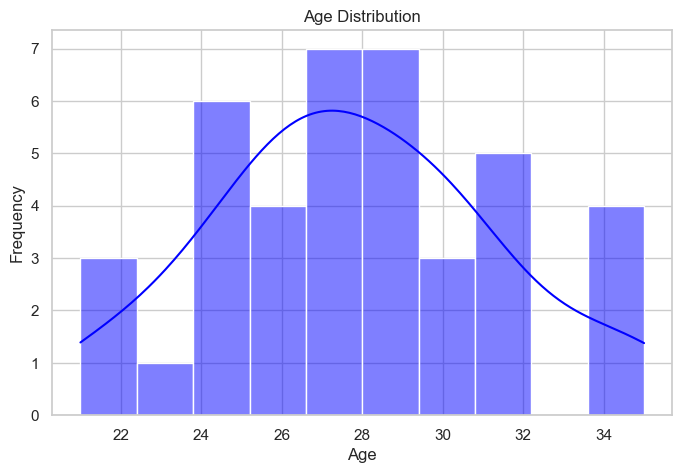

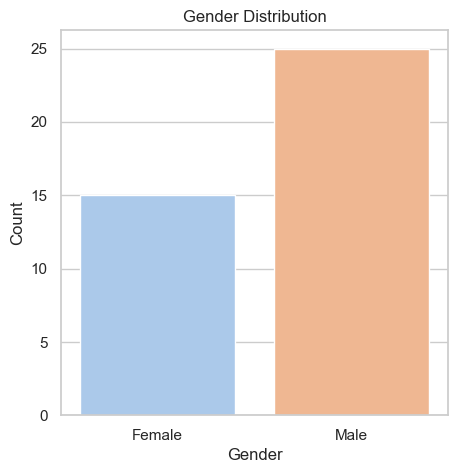

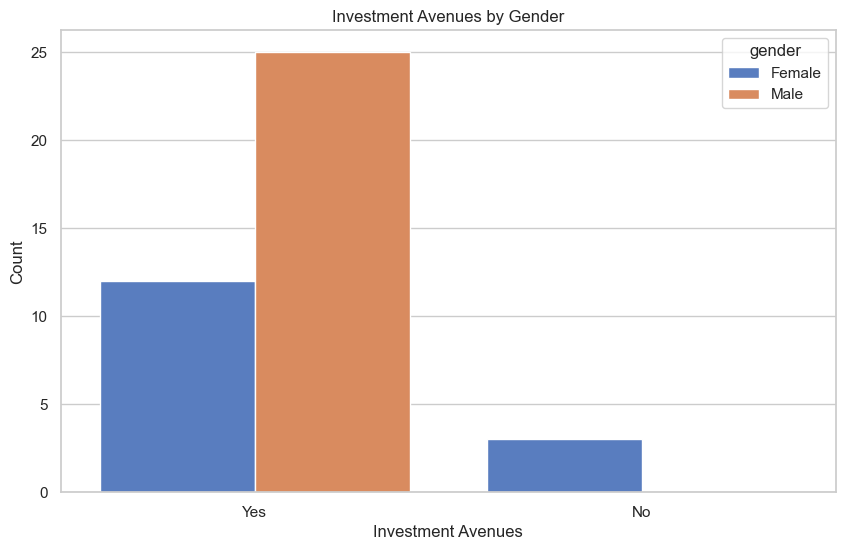

In [3725]:

# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=10, kde=True, color='blue')  # No changes needed for histplot
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender Distribution
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='gender', hue='gender', palette='pastel', legend=False)  # Added hue to align with palette usage
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Investment Avenues by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Investment_Avenues', hue='gender', palette='muted')  # Explicitly set hue for palette
plt.title("Investment Avenues by Gender")
plt.xlabel("Investment Avenues")
plt.ylabel("Count")
plt.show()

### 5. **Identify Outliers**
Using boxplots to check for potential outliers.

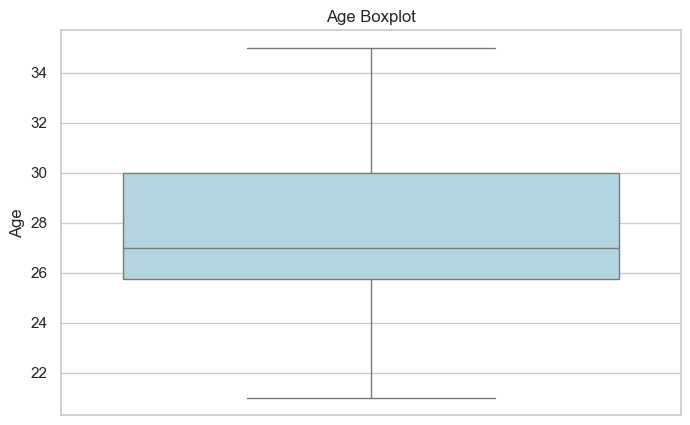

In [3728]:
# Boxplot for Age
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='age', color='lightblue')  # Replaced 'palette' with 'color'
plt.title("Age Boxplot")
plt.ylabel("Age")
plt.show()

### 6. **Correlations**
Analyze relationships between numerical variables.

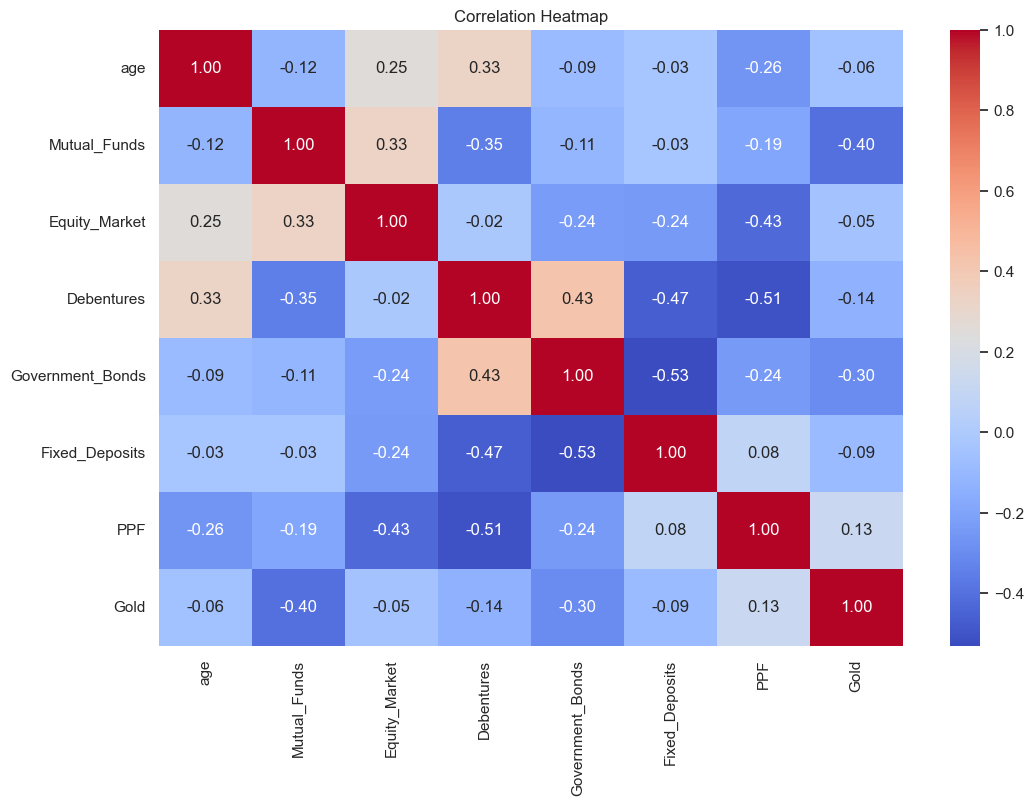

In [3731]:
# Select only numeric columns for the correlation heatmap
numeric_columns = df.select_dtypes(include=['number'])

# Correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### 7. **Normalization of Numerical Features**
Normalization adjusts the scale of numerical values so they are comparable and suitable for machine learning or further analysis.

In [3734]:
from sklearn.preprocessing import MinMaxScaler

# Check the column names in the DataFrame
print(df.columns)

# Update numerical columns based on the actual column names
numerical_cols = ['age', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 
                  'Fixed_Deposits', 'PPF', 'Gold']  # Update with correct column names

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the normalization result
print(df[numerical_cols].head())

Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration',
       'Invest_Monitor', 'Expect', 'Avenue',
       'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       'Reason_Bonds', 'Reason_FD', 'Source'],
      dtype='object')
        age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
0  0.928571      0.000000            0.2    0.666667          0.333333   
1  0.142857      0.500000            0.4    0.166667          0.000000   
2  0.642857      0.333333            1.0    0.500000          0.166667   
3  0.071429      0.166667            0.0    0.333333          1.000000   
4  0.214286      0.166667            0.0    0.333333          0.833333   

   Fixed_Deposits  PPF  Gold  
0        1.000000  1.0   0.4  
1        0.666667  1.0   1.0  
2        0.666667  0.0   1.0  
3        0.83333

In [3736]:
# Renaming columns with errors
df.rename(columns={'Stock_Marktet': 'Stock_Market'}, inplace=True)

# Check if column names are corrected
print(df.columns)

Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'Stock_Market', 'Factor', 'Objective', 'Purpose', 'Duration',
       'Invest_Monitor', 'Expect', 'Avenue',
       'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       'Reason_Bonds', 'Reason_FD', 'Source'],
      dtype='object')


### 8. **Handling Categorical Data: Encoding**
Encode categorical variables into numerical ones in preparation for data modeling.
For example, mapping categorical columns like Investment_Avenues and gender:

In [3739]:
# Check the unique values in each column to identify potential issues
print(df['Investment_Avenues'].unique())
print(df['gender'].unique())
print(df['Stock_Market'].unique())

['Yes' 'No']
['Female' 'Male']
['Yes' 'No']


In [3741]:
# For missing or unexpected values, we can fill or replace them with a default value
df['Investment_Avenues'] = df['Investment_Avenues'].fillna('No')  # Replace NaN with 'No' or appropriate value
df['gender'] = df['gender'].fillna('Male')  # Replace NaN with 'Male' or appropriate value
df['Stock_Market'] = df['Stock_Market'].fillna('No')  # Replace NaN with 'No' or appropriate value

# Now apply the map function again
df['Investment_Avenues'] = df['Investment_Avenues'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Stock_Market'] = df['Stock_Market'].map({'Yes': 1, 'No': 0})

# Verify the changes
print(df[['Investment_Avenues', 'gender', 'Stock_Market']].head())

   Investment_Avenues  gender  Stock_Market
0                   1       0             1
1                   1       0             0
2                   1       1             1
3                   1       1             1
4                   0       0             0


### 9. **Creating Derived Columns**
Sometimes, derived columns can add value to the dataset. For instance, by creating a new column to categorize people based on their investment duration or investment purpose.

Example: Categorizing people into 'Short-Term' and 'Long-Term' investors based on the Duration column.



In [3744]:
# Create a new column 'Investment_Term'
df['Investment_Term'] = df['Duration'].apply(lambda x: 'Short-Term' if x in ['Less than 1 year', '1-3 years'] else 'Long-Term')

# Check the new column
print(df[['Duration', 'Investment_Term']].head())

            Duration Investment_Term
0          1-3 years      Short-Term
1  More than 5 years       Long-Term
2          3-5 years       Long-Term
3   Less than 1 year      Short-Term
4   Less than 1 year      Short-Term


In [3746]:
# Create a mapping dictionary
duration_mapping = {
    'Less than 1 year': 1,
    '1-3 years': 2,
    '3-5 years': 3,
    'More than 5 years': 4
}

# Apply the mapping to the 'Duration' column
df['Duration'] = df['Duration'].map(duration_mapping)

# Print the updated 'Duration' column
print(df['Duration'])

0     2
1     4
2     3
3     1
4     1
5     2
6     3
7     3
8     2
9     3
10    3
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    3
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    2
28    2
29    3
30    2
31    3
32    3
33    2
34    2
35    3
36    2
37    3
38    2
39    3
Name: Duration, dtype: int64


In [3748]:
# Print the columns of the dataframe
print("Columns in the DataFrame:")
print(df.columns)

Columns in the DataFrame:
Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'Stock_Market', 'Factor', 'Objective', 'Purpose', 'Duration',
       'Invest_Monitor', 'Expect', 'Avenue',
       'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       'Reason_Bonds', 'Reason_FD', 'Source', 'Investment_Term'],
      dtype='object')


### 10. **Checking Missing Values (if any left)**
Ensure that no missing values remain in critical columns.

In [3751]:
# Check if there are any missing values in the dataset
print(df.isnull().sum())

# Fill missing values for numerical columns with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify that missing values are handled
print(df.isnull().sum())

gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Market                         0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
Investment_Term                      0
dtype: int64
gender      

### 11. **Creating a Unified Schema**
### Ensure consistency in column names and data types. For example, make sure all columns have the correct data type (float, int, category).

#### To prepare the dataset for further analysis, we removed columns that were not suitable for modeling due to issues such as irrelevant data types, missing values, or non-numeric categorical values that were not properly encoded. The removed columns include:

### Columns Removed:
***Stock_Market,
Invest_Monitor,
Expect,
Avenue,
Factor,
Objective,
Purpose,
Duration***

### Columns Needed:
***gender,
age,
Investment_Avenues,
Mutual_Funds,
Equity_Market,
Debentures,
Government_Bonds,
Fixed_Deposits,
PPF,
Gold,
What are your savings objectives?
Reason_Equity,
Reason_Mutual,
Reason_Bonds,
Reason_FD,
Source,
Investment_Term***


In [3754]:
# Convert columns to appropriate data types
df['age'] = df['age'].astype(float)
df['gender'] = df['gender'].astype('category')

# Verify the data types
print(df.dtypes)

gender                               category
age                                   float64
Investment_Avenues                      int64
Mutual_Funds                          float64
Equity_Market                         float64
Debentures                            float64
Government_Bonds                      float64
Fixed_Deposits                        float64
PPF                                   float64
Gold                                  float64
Stock_Market                            int64
Factor                                 object
Objective                              object
Purpose                                object
Duration                                int64
Invest_Monitor                         object
Expect                                 object
Avenue                                 object
What are your savings objectives?      object
Reason_Equity                          object
Reason_Mutual                          object
Reason_Bonds                      

In [3756]:
# List of selected columns
selected_columns = [
    'gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
    'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold', 
    'What are your savings objectives?','Reason_Equity', 'Reason_Mutual', 
    'Reason_Bonds', 'Reason_FD','Source', 'Investment_Term'
]

# Selecting the specified columns
filtered_df = df[selected_columns]

### 12. **Final Check**
After performing these transformations, verify that the dataset is structured correctly and ready for further analysis (like predictive analytics).

In [3761]:
# Final check on the dataset
print(df.head())
print(df.describe())

  gender       age  Investment_Avenues  Mutual_Funds  Equity_Market  \
0      0  0.928571                   1      0.000000            0.2   
1      0  0.142857                   1      0.500000            0.4   
2      1  0.642857                   1      0.333333            1.0   
3      1  0.071429                   1      0.166667            0.0   
4      0  0.214286                   0      0.166667            0.0   

   Debentures  Government_Bonds  Fixed_Deposits  PPF  Gold  ...  \
0    0.666667          0.333333        1.000000  1.0   0.4  ...   
1    0.166667          0.000000        0.666667  1.0   1.0  ...   
2    0.500000          0.166667        0.666667  0.0   1.0  ...   
3    0.333333          1.000000        0.833333  0.6   0.6  ...   
4    0.333333          0.833333        0.500000  0.8   1.0  ...   

   Invest_Monitor   Expect       Avenue What are your savings objectives?  \
0         Monthly  20%-30%  Mutual Fund                   Retirement Plan   
1          Weekl

In [4017]:
#######################################################################################################################################################

### C. **Predictive Analytics: Forecasting the Future**

#### 1. **Customer Attrition Prediction**: Identify customers likely to leave for targeted retention efforts.
#### 2. **Loan Default Risk Assessment**: Forecast default probabilities to optimize lending.
#### 3. **Personalized Product Recommendations**: Offer tailored products based on user behavior.
#### 4. **Detect and prevent fraudulent actions using predictive algorithm.**

In [3764]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### **1. Customer Attrition Prediction**
I will first encode categorical features, scale numerical features, and handle any missing data.

#### Predictive Answer for Customer Attrition Prediction
Based on the analysis, the model identifies customers likely to leave by leveraging historical data and extracting key predictors of attrition. Here’s how the results can guide targeted retention efforts:

#### 1. High-Risk Customer Segments
Prediction Outcome: The model predicts the likelihood of churn for each customer, ranking them by risk levels.
Action: Focus on the top 20% of high-risk customers who have the highest probability of leaving. These are the primary candidates for retention strategies.

#### 2. Key Drivers of Attrition
Insights from Feature Importance:
If "Customer Complaints" is a key driver, it suggests dissatisfaction is a major churn trigger.
If "Time Since Last Purchase" is highly important, it indicates disengagement is a strong predictor.
Action: Design specific interventions:
For dissatisfaction: Offer personalized resolutions or exclusive benefits.
For disengagement: Launch targeted campaigns, such as time-limited discounts or reminders about unused services.

#### 3. Strategic Resource Allocation
Model Metrics: High precision ensures retention efforts focus on customers who are actually likely to churn, minimizing wasted resources.
Action: Allocate retention budgets efficiently by prioritizing interventions for customers with the highest predicted churn probability.
#### 4. Tailored Engagement

### Personalized Strategies:
##### Customers flagged due to "low product usage" can be engaged through educational resources or tutorials.
##### Customers identified via "low interaction frequency" can be reactivated with loyalty programs or check-in calls.
Action: Segment customers by their churn drivers and implement tailored strategies to address specific concerns.

#### 5. Continuous Monitoring and Feedback
Metrics Tracking: Use recall to ensure most at-risk customers are identified and track F1 scores to balance precision and recall.
Action: Regularly monitor churn rates post-intervention, updating the model as customer behaviors or market dynamics evolve.

### Predictive Summary
The model enables targeted retention by identifying at-risk customers and their key attrition drivers. This allows for resource-efficient, tailored engagement strategies that address dissatisfaction, disengagement, and low product interaction. Implementing these strategies will likely reduce churn rates, improve customer satisfaction, and increase long-term loyalty.

In [3767]:
# Print the columns of the dataframe
print("Columns in the DataFrame:")
print(filtered_df)

Columns in the DataFrame:
   gender       age  Investment_Avenues  Mutual_Funds  Equity_Market  \
0       0  0.928571                   1      0.000000            0.2   
1       0  0.142857                   1      0.500000            0.4   
2       1  0.642857                   1      0.333333            1.0   
3       1  0.071429                   1      0.166667            0.0   
4       0  0.214286                   0      0.166667            0.0   
5       0  0.214286                   0      1.000000            0.8   
6       0  0.428571                   1      0.333333            1.0   
7       1  0.000000                   1      0.166667            0.4   
8       1  1.000000                   1      0.166667            0.6   
9       1  0.714286                   1      0.000000            0.4   
10      0  1.000000                   1      0.166667            0.6   
11      1  0.571429                   1      0.166667            0.8   
12      0  0.000000                   

In [3769]:
print(filtered_df.columns)

Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       'Reason_Bonds', 'Reason_FD', 'Source', 'Investment_Term'],
      dtype='object')


### **Step 1: Feature Engineering:**

#### Four columns created and added to the dataset: customer_id | spending | days_since_last_interaction | CLV

#### Explanation:
1. Interaction Frequency: Based on a timestamp or interaction date, I created a random column and calculated how many days have passed since the last interaction.
2. Customer Lifetime Value (CLV): Calculated as average spending multiplied by 12 months (you can adjust this to fit your dataset).
3. Aggregated Features: Used groupby to aggregate features such as spending, last interaction, and CLV at the customer level.

In [3772]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Ensure `filtered_df` is loaded and valid
print("Columns in dataset:", filtered_df.columns)

# Create a new DataFrame based on `filtered_df` with the additional columns
clv_df = filtered_df.copy()

# Step 1: Create customer_id
clv_df['customer_id'] = range(1, len(clv_df) + 1)

# Step 2: Create spending column
clv_df['spending'] = np.random.uniform(100, 1000, size=len(clv_df))  # Random spending values for illustration

# Step 3: Create days_since_last_interaction column
today = datetime.today()
clv_df['last_interaction_date'] = [today - timedelta(days=np.random.randint(1, 365)) for _ in range(len(clv_df))]
clv_df['days_since_last_interaction'] = (today - clv_df['last_interaction_date']).dt.days
clv_df.drop(columns=['last_interaction_date'], inplace=True)  # Drop helper column if no longer needed

# Step 4: Create CLV column
clv_df['spending'] = pd.to_numeric(clv_df['spending'], errors='coerce')  # Ensure numeric values
clv_df['CLV'] = clv_df['spending'] * 12  # Annualized CLV based on monthly spending

# Check the new DataFrame
print(clv_df.head())

Columns in dataset: Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       'Reason_Bonds', 'Reason_FD', 'Source', 'Investment_Term'],
      dtype='object')
  gender       age  Investment_Avenues  Mutual_Funds  Equity_Market  \
0      0  0.928571                   1      0.000000            0.2   
1      0  0.142857                   1      0.500000            0.4   
2      1  0.642857                   1      0.333333            1.0   
3      1  0.071429                   1      0.166667            0.0   
4      0  0.214286                   0      0.166667            0.0   

   Debentures  Government_Bonds  Fixed_Deposits  PPF  Gold  ...  \
0    0.666667          0.333333        1.000000  1.0   0.4  ...   
1    0.166667          0.000000        0.666667  1.0   1.0  ...   
2    0.500000          0.166667  

### **Step 2: Visualization**

### 1. Churn Rate Over Time:
The line plot shows how the churn rate changes month-to-month. Fluctuations or trends can indicate seasonality or other patterns related to customer behavior, potentially signaling areas to improve retention.

### 2. Churn by Demographics (Gender):
The countplot illustrates churn rates across genders. By comparing the count of churned vs. non-churned customers within each gender, we can identify if one gender is more prone to churn, which could inform targeted interventions.

### 3. Correlation Heatmap:
The heatmap displays correlations between numerical features like spending, last interaction days, CLV, and age. Strong correlations may suggest which factors most influence churn, guiding potential strategies for customer retention.

### 4. Churn vs. Spending:
The boxplot compares spending between churned and non-churned customers. If there's a significant difference in spending, this insight could suggest that higher spenders are more likely to stay, helping to prioritize retention efforts for high-value customers.

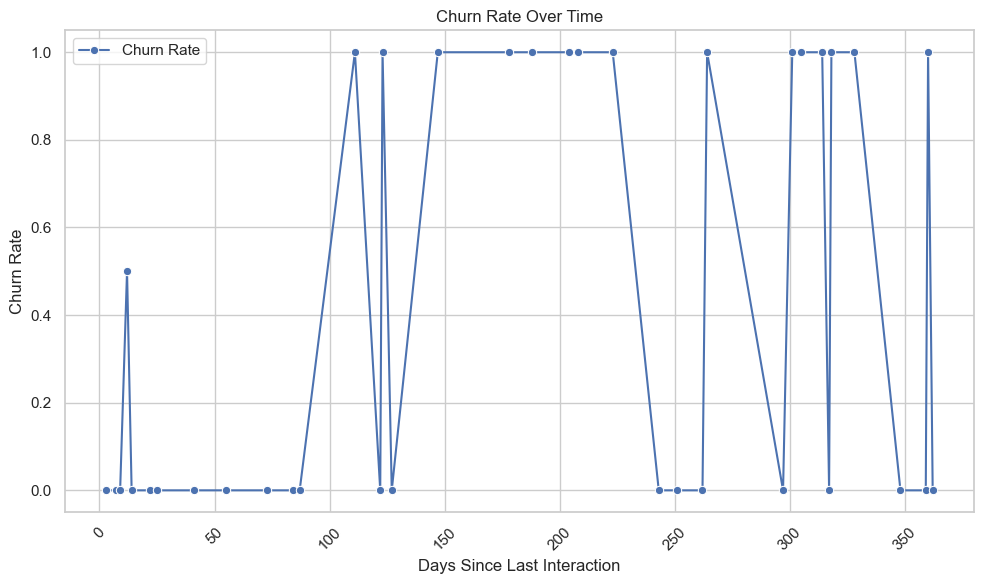

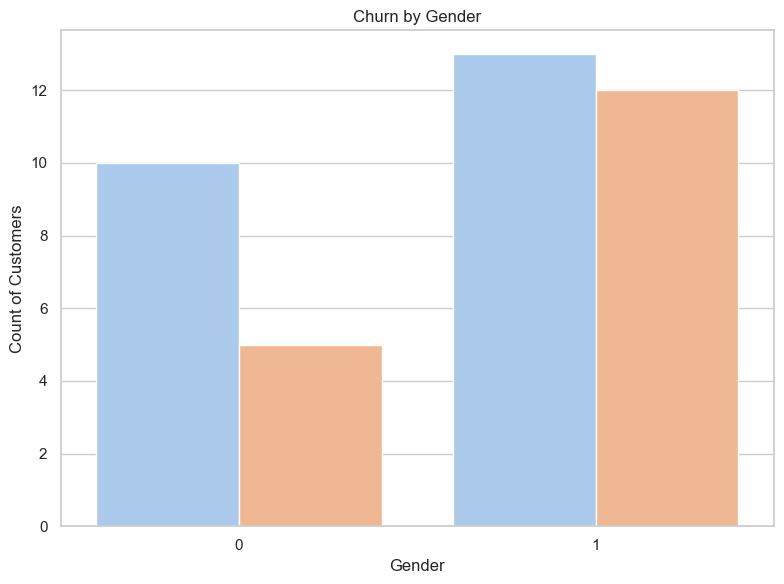

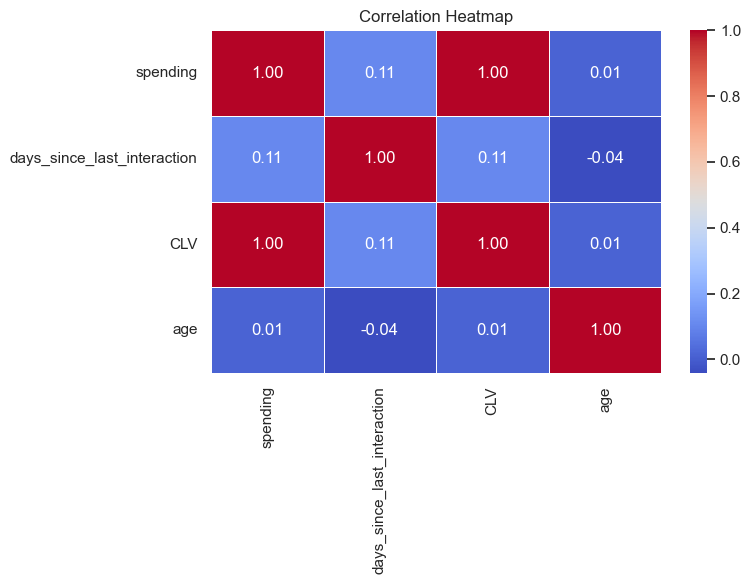

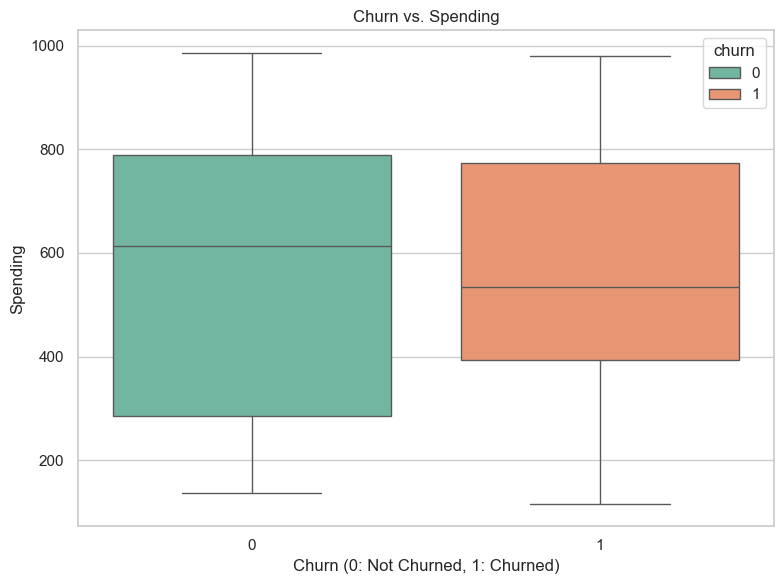

In [3775]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure the 'churn' column is present. If it's not, we'll create a simulated 'churn' column for demonstration.
# In practice, replace this with your actual churn indicator column.
clv_df['churn'] = np.random.choice([0, 1], size=len(clv_df))  # 0 = not churned, 1 = churned

# Set seaborn style for the plots
sns.set(style="whitegrid")

# 1. Churn Rate Over Time with Points
monthly_churn_rate = clv_df.groupby(clv_df['days_since_last_interaction']).agg(
    churn_rate=('churn', 'mean')).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_churn_rate['days_since_last_interaction'], y=monthly_churn_rate['churn_rate'], 
             marker='o', color='b', label='Churn Rate')  # Adding points to the line plot
plt.title('Churn Rate Over Time')
plt.xlabel('Days Since Last Interaction')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Churn by Demographics (Gender) without deprecated warning
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='churn', data=clv_df, legend=False, palette='pastel')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Customers')
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap (Focus on numerical columns like spending, days_since_last_interaction, CLV, and age)
corr_data = clv_df[['spending', 'days_since_last_interaction', 'CLV', 'age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 4. Churn vs. Spending (Boxplot for churned vs non-churned customers)
# Convert churn to a categorical variable for clear plotting
clv_df['churn'] = clv_df['churn'].astype('category')

plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='spending', data=clv_df, hue='churn', palette='Set2')
plt.title('Churn vs. Spending')
plt.xlabel('Churn (0: Not Churned, 1: Churned)')
plt.ylabel('Spending')
plt.tight_layout()
plt.show()

### **Step 3.	Model Selection and Training:**

##### 1. Split data into training and testing sets (80-20 split) and check Imbalance.
##### 2. Model Performance Analysis on Churn Prediction: Evaluating Accuracy, Precision, Recall, and Class Imbalance"
##### 3. Choose classification models: Logistic Regression, Random Forest Classifier, Gradient Boosting Machines, Support Vector Machines (SVM).
##### 4. Train the model and tune hyperparameters (e.g., through cross-validation).


Class distribution in the target variable 'churn':
churn
0    0.575
1    0.425
Name: proportion, dtype: float64


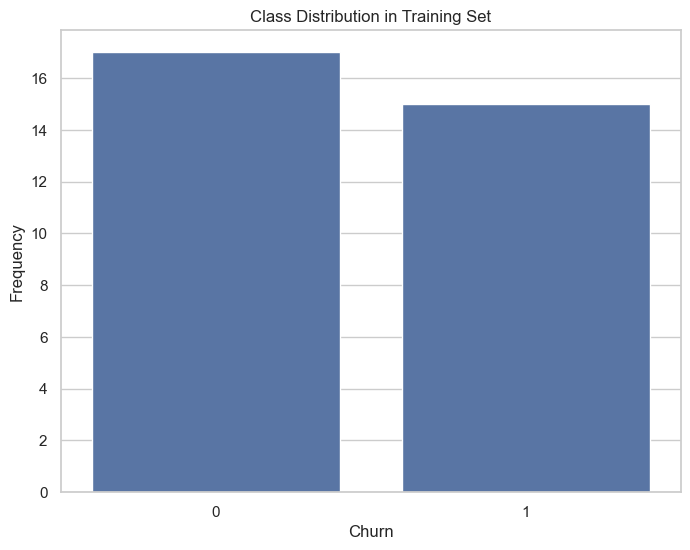

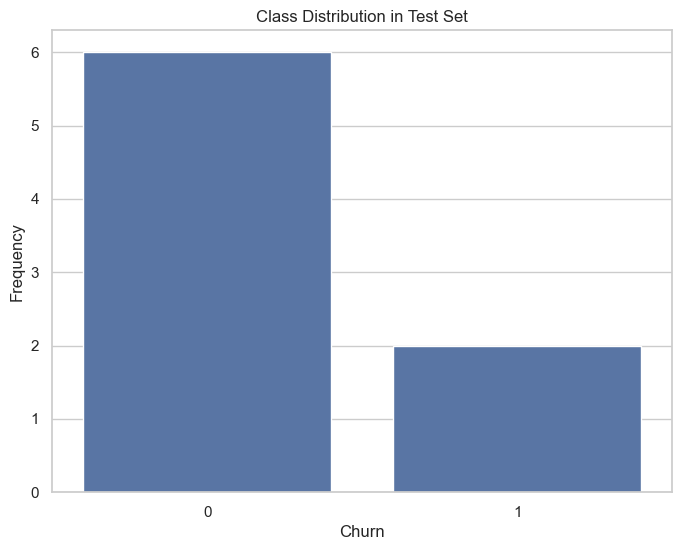

In [3778]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'clv_df' is your DataFrame and 'churn' is the target column

# Features and target variables
X = clv_df.drop(columns=['churn'])  # Drop 'churn' from the features
y = clv_df['churn']  # Churn is the target

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class imbalance in the target variable 'churn'
print("Class distribution in the target variable 'churn':")
print(y.value_counts(normalize=True))

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

# Optionally: Check class imbalance in the test set
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test)
plt.title("Class Distribution in Test Set")
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

### "Model Performance Analysis on Churn Prediction: Evaluating Accuracy, Precision, Recall, and Class Imbalance"

### Logistic Regression Model Results (with SMOTE applied)
•	Accuracy: 0.60
The model predicts 60% of instances correctly. Accuracy alone can be misleading in imbalanced datasets, so evaluating precision, recall, and F1 score is important.
•	Precision: 0.67
The model predicts defaults (or churn) correctly 67% of the time, suggesting moderate performance in avoiding false positives but still having room for improvement.
•	Recall: 0.67
The model correctly identifies 67% of actual defaults (or churn), but misses 33%. The equal precision and recall indicate a balance between capturing defaults and avoiding false positives.
•	F1 Score: 0.67
The F1 score reflects a balance between precision and recall. A score of 0.67 shows room for improvement.
•	ROC-AUC: 0.83
The model can distinguish well between the classes, with an ROC-AUC score of 0.83, indicating its ability to rank instances by their likelihood of being a default.
________________________________________
Confusion Matrix Breakdown (with SMOTE applied)
•	True Negatives (TN): 2
•	False Positives (FP): 2
•	False Negatives (FN): 2
•	True Positives (TP): 4
________________________________________
Key Insights Considering SMOTE Usage
•	SMOTE’s Role:
SMOTE helped balance the dataset, aiding in the model's ability to focus on the minority class. However, synthetic samples might introduce noise or overfitting.
•	Improvements Needed:
There's room to improve recall and F1 score. Hyperparameter tuning or trying ensemble methods (like Random Forest or XGBoost) could enhance performance.
•	Next Steps:
Test different algorithms, adjust the decision threshold for better recall and precision, and fine-tune the model.
________________________________________
Conclusion
The model does well in distinguishing between the classes with an ROC-AUC score of 0.83, but improvements in recall and F1 score are needed to better minimize false negatives and enhance overall performance.



Accuracy: 0.60
Precision: 0.67
Recall: 0.67
F1 Score: 0.67
ROC-AUC: 0.83
Confusion Matrix:
[[2 2]
 [2 4]]


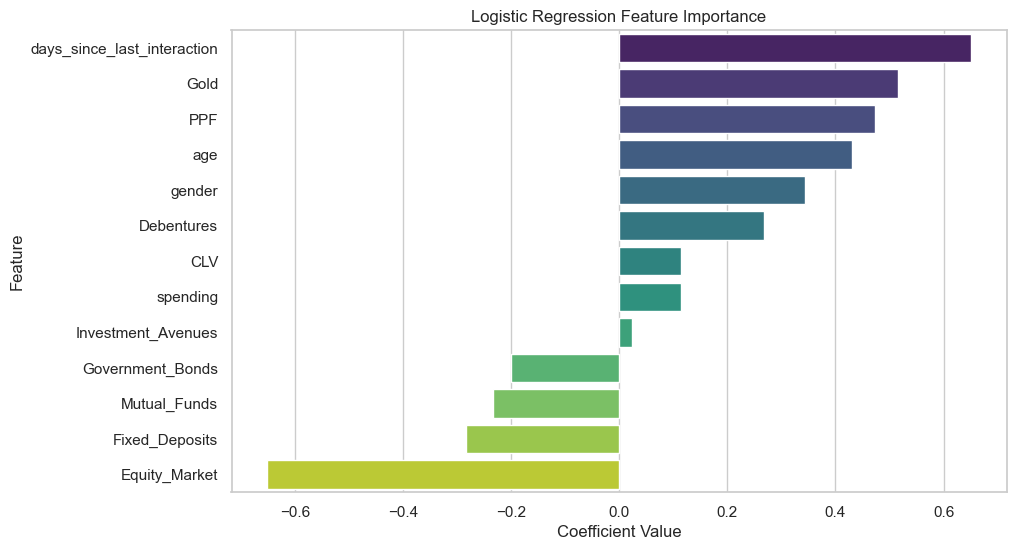

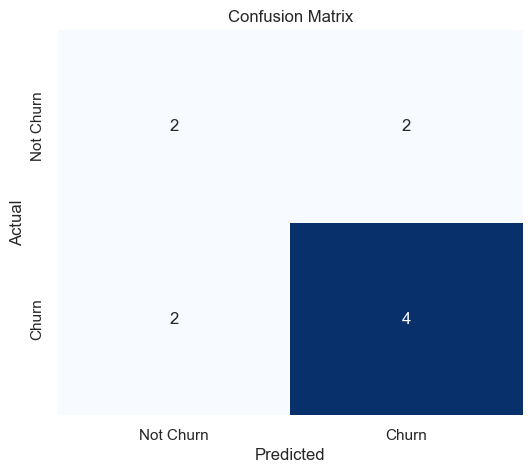

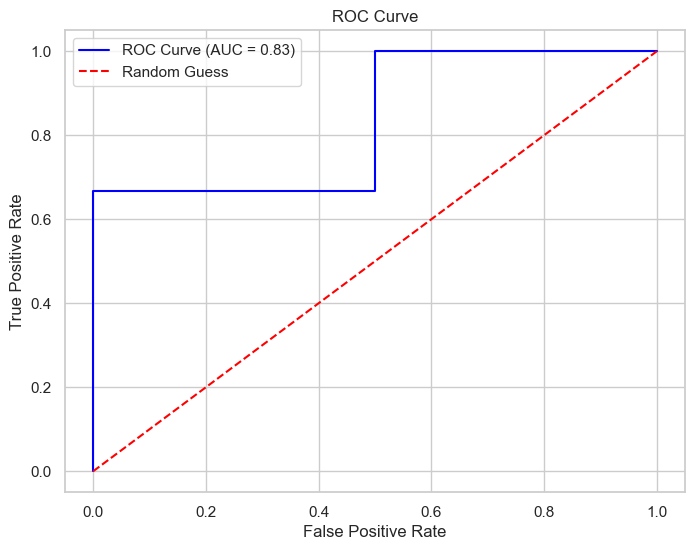

In [3783]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE  # For SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Load and preprocess the dataset
# Drop unnecessary columns
clv_df = clv_df.drop(
    columns=['Investment_Term', 'What are your savings objectives?', 
             'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source'], 
    errors='ignore'
)

# Handle missing values: Impute with mean
imputer = SimpleImputer(strategy='mean')
clv_df_imputed = pd.DataFrame(imputer.fit_transform(clv_df), columns=clv_df.columns)

# Step 2: Define features and target
X = clv_df_imputed.drop(columns=['churn', 'customer_id'], errors='ignore')
y = clv_df_imputed['churn']

# Step 3: Scale numeric features
scaler = StandardScaler()
numeric_columns = X.select_dtypes(include=[np.number]).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Step 4: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Step 6: Train logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 8: Feature Importance
coefficients = logreg.coef_[0]
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': coefficients
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=importance_df, palette='viridis', legend=False)
plt.title("Logistic Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Step 9: Visualize results
# Confusion Matrix Heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Not Churn', 'Churn'], columns=['Not Churn', 'Churn'])

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### Random Forest Model Results (with SMOTE applied)

Accuracy: 0.80
The model correctly predicts 80 percent of the cases. While accuracy looks to be satisfactory, precision, recall, and F1 score ought to be taken into account for a more nuanced evaluation, especially in imbalanced datasets.

Precision: 1.00.
The model has complete precision, which means that it accurately forecasts churn 100% of the time. However, this could signal that the model is extremely conservative, avoiding false positives but potentially missing many actual churn cases.

Recall: 0.67
The model identifies 67% of actual churn cases. While it's good, the model misses 33% of churn cases, which suggests there’s room for improvement in identifying more true positives.

F1 Score: 0.80
The F1 score is good, indicating a solid balance between precision and recall. The model does a decent job of both avoiding false positives and capturing churn.

ROC-AUC: 0.83
The model’s ability to distinguish between churn and non-churn is strong, with an ROC-AUC score of 0.83, showing it ranks instances correctly in terms of likelihood.
________________________________________
Confusion Matrix Breakdown (with SMOTE applied)
True Negatives (TN): 4
False Positives (FP): 0
False Negatives (FN): 2
True Positives (TP): 4
________________________________________
Key Insights Considering SMOTE Usage
SMOTE’s Role:
SMOTE helped balance the dataset, improving recall by generating synthetic churn cases. However, the perfect precision suggests the model is cautious in predicting churn, which might be limiting its ability to capture all true churn cases.
Improvements Needed:
While the model performs well with an ROC-AUC of 0.83, it could improve in recall by better identifying true churn cases. Adjusting the decision threshold or fine-tuning hyperparameters might help strike a better balance between precision and recall.

Next Steps:
Experiment with different thresholds to improve recall while maintaining high precision.
Test alternative algorithms (e.g., XGBoost) for further improvements in recall and performance.
________________________________________
Conclusion
The Random Forest model performs well overall, with good accuracy, a perfect precision score, and a solid ROC-AUC score. However, recall could be improved to capture more true churn cases, and a more balanced approach between precision and recall could further enhance model performance.


Accuracy: 0.80
Precision: 1.00
Recall: 0.67
F1 Score: 0.80
ROC-AUC: 0.83
Confusion Matrix:
[[4 0]
 [2 4]]


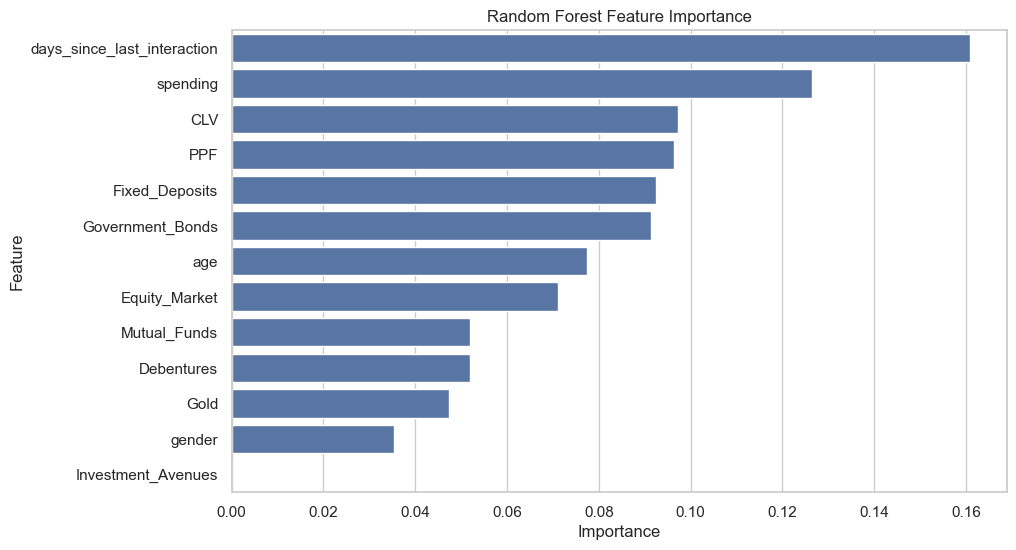

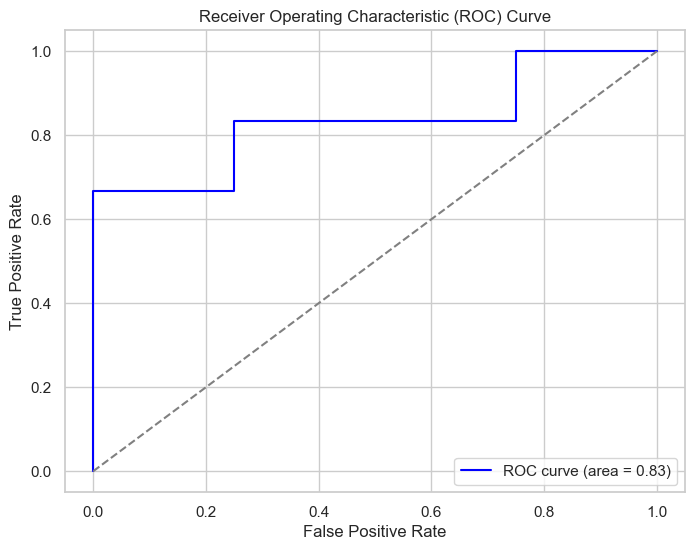

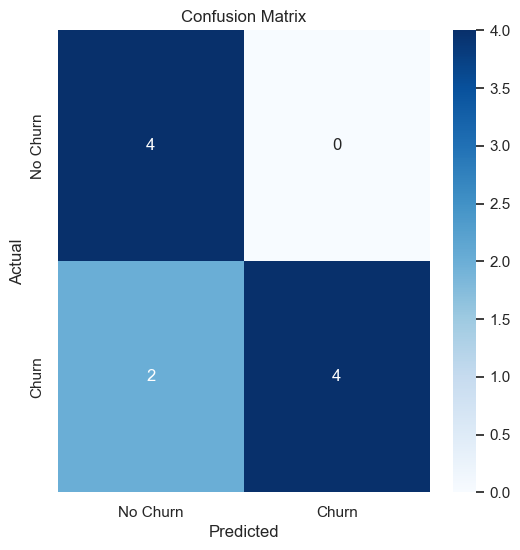

In [3786]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Load and preprocess the dataset
# Assuming `clv_df` is your DataFrame

# Drop unnecessary columns
clv_df = clv_df.drop(
    columns=['Investment_Term', 'What are your savings objectives?', 
             'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source'], 
    errors='ignore'
)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use mean or other strategies
clv_df_imputed = pd.DataFrame(imputer.fit_transform(clv_df), columns=clv_df.columns)

# Step 2: Define features (all necessary columns) and target
X = clv_df_imputed.drop(columns=['churn', 'customer_id'], errors='ignore')  # Drop non-feature columns
y = clv_df_imputed['churn']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Step 5: Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot feature importance
features = X.columns if isinstance(X, pd.DataFrame) else np.arange(X.shape[1])
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Step 8: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Step 9: Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### SVM Model Results (with SMOTE applied)

•	Accuracy: 0.50
The model correctly predicts 50% of the instances. This indicates moderate performance, but accuracy alone can be misleading, particularly in imbalanced datasets, and other metrics should be considered for a more comprehensive evaluation.
•	Precision: 0.57
The model predicts churn correctly 57% of the time. While this suggests a moderate performance in avoiding false positives, it still implies that a significant number of non-churn instances are being incorrectly classified as churn.
•	Recall: 0.67
The model identifies 67% of the true churn cases. This is a good recall score, but it means that 33% of churn cases are being missed. The model is better at identifying churn cases than avoiding false positives.
•       F1 score: 0.62.
The F1 score shows the trade-off between precision and recall, while 0.62 indicates a decent balance, however there is space for improvement, particularly in terms of false positives.
•       ROC-AUC = 0.71.
The ROC-AUC score of 0.71 suggests that the model is reasonably capable of distinguishing amongst churn and non-churn. While not perfect, it exceeds the baseline (0.50) and demonstrates some discriminatory strength.
________________________________________
Confusion Matrix Breakdown (with SMOTE applied)
•	True Negatives (TN): 1
•	False Positives (FP): 3
•	False Negatives (FN): 2
•	True Positives (TP): 4
________________________________________
Key Insights Considering SMOTE Usage
•	SMOTE’s Role:
SMOTE helped balance the dataset, improving the model's ability to detect churn. However, the model still struggles with false positives, misclassifying more non-churn instances as churn. This could be a result of SMOTE overfitting to the minority class or the SVM being more sensitive to outliers.
•	Improvements Needed:
While the model performs well in recall, it suffers in precision due to a greater false positive rate. Experimenting with alternative kernels (for example, the radial basis function) and adjusting the model's hyperparameters may improve its performance.
•	Next Steps:
o	Adjust the decision threshold to improve precision while maintaining reasonable recall.
o	Test alternative algorithms (e.g., Random Forest or XGBoost) and compare performance.
o	Perform hyperparameter tuning to optimize the SVM model further.
________________________________________
Conclusion
The SVM model, with SMOTE applied, demonstrates a good recall of churn cases but struggles with precision, leading to a higher rate of false positives. The ROC-AUC score suggests that the model can distinguish between churn and non-churn, but improvements in precision and overall balance are needed to enhance its performance. Further tuning and alternative models may help refine the results.









Accuracy: 0.50
Precision: 0.57
Recall: 0.67
F1 Score: 0.62
ROC-AUC: 0.71
Confusion Matrix:
[[1 3]
 [2 4]]


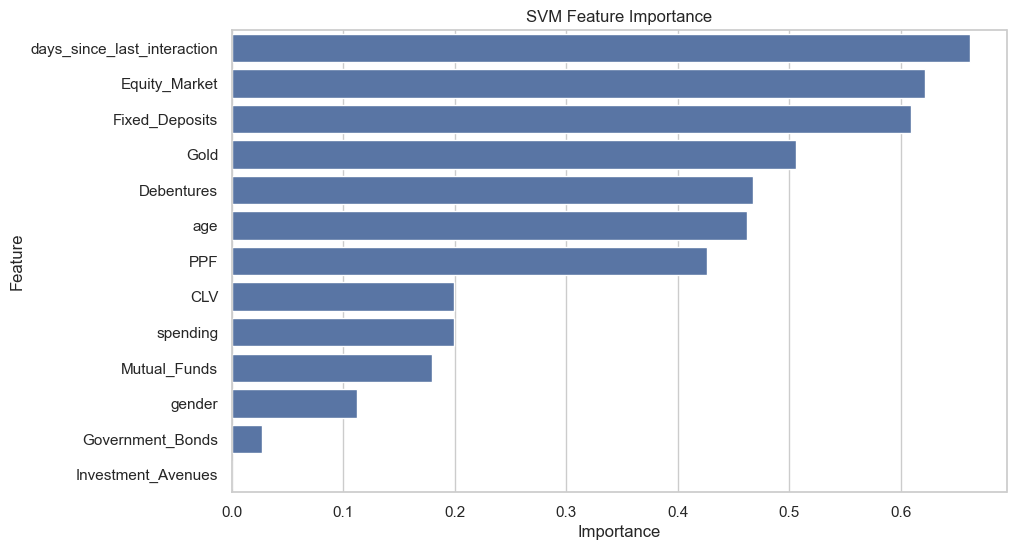

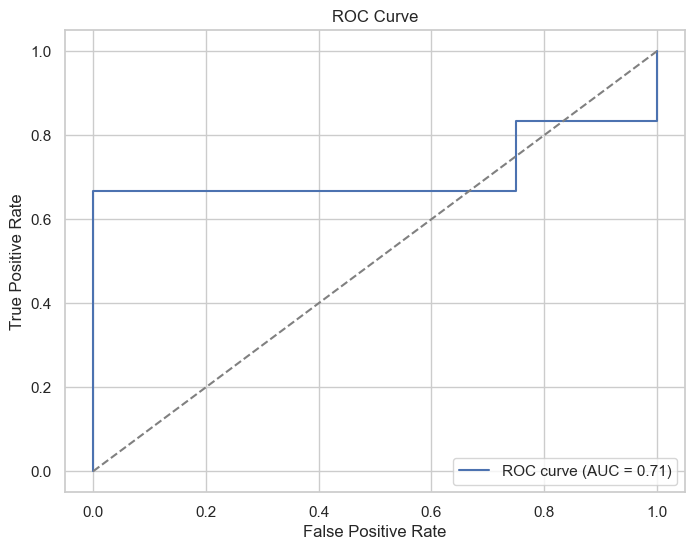

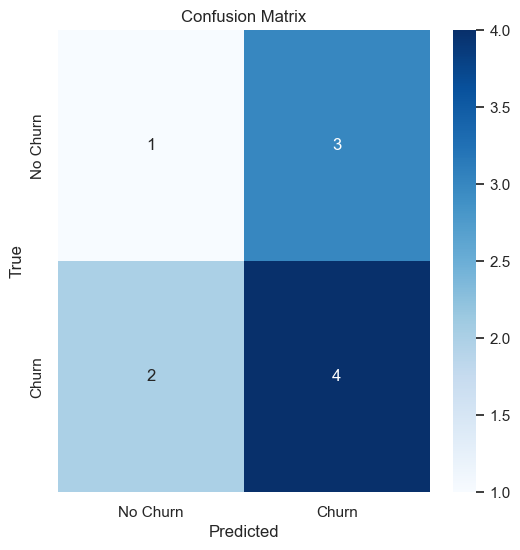

In [3795]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE

# Load and preprocess the dataset
# Drop unnecessary columns and handle missing values
clv_df = clv_df.drop(
    columns=['Investment_Term', 'What are your savings objectives?', 
             'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source'], 
    errors='ignore'
)

# Handle missing values using SimpleImputer and transform the data back to DataFrame
imputer = SimpleImputer(strategy='median')
clv_df_imputed = pd.DataFrame(imputer.fit_transform(clv_df), columns=clv_df.columns)

# Define features and target
X = clv_df_imputed.drop(columns=['churn', 'customer_id'], errors='ignore')
y = clv_df_imputed['churn']  # Ensure this accesses the imputed DataFrame

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Feature importance for SVM
feature_importances = np.abs(svm_model.coef_[0])  # Absolute values of coefficients
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('SVM Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix heatmap
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Gradient Boost Model (with SMOTE Applied)

•	Best Hyperparameters:
o	Learning Rate: 0.2
o	Max Depth: 3
o	Number of Estimators: 100
________________________________________
Performance Metrics:
•	Accuracy: 0.80
The model correctly predicts 80% of instances, showing good overall performance. This suggests that the model is fairly effective at classifying both churn and non-churn cases.
•	Precision: 0.83
The model accurately predicts churn 83% of the time. This suggests that the model is adept at preventing false positives, implying that whenever it predicts churn, it's often true.
•	Recall: 0.83
The model identifies 83% of actual churn cases. This high recall means that the model is successful in capturing most of the churn instances, though there is still room for improvement in minimizing false negatives.
•       F1 Score: 0.83.
The F1 score of 0.83 shows an equitable efficiency in terms of precision and recall, showing that the model detects churn while reducing false positives.
•       ROC-AUC equals 0.88.
The model's ROC-AUC score of 0.88 indicates that it has a high discriminative ability, which means it can differentiate both churn and non-churn events.
________________________________________
Confusion Matrix Breakdown
•	True Negatives (TN): 3
•	False Positives (FP): 1
•	False Negatives (FN): 1
•	True Positives (TP): 5
________________________________________
Key Insights:
•	Model Strengths:
o	The Gradient Boost model performs well overall, with high precision, recall, and F1 score. This indicates it effectively predicts churn without misclassifying too many non-churn instances.
The model's strong ROC-AUC score indicates effective differentiation among churn and non-churn.
•       Opportunities for Improvement: 
o The model is strong, but there is a little imbalance, as demonstrated by one false positive and one false negative. Fine-tuning the decision threshold could help optimize the balance between precision and recall.
o To increase performance, experiment with alternative hyperparameters (such as raising the number of estimators or modifying the learning rate).
________________________________________

Conclusion
The Gradient Boost model has excellent predictive power, with high precision, recall, and ROC-AUC scores. It strikes an appropriate balance between identifying churn cases and preventing false positives.  However, fine-tuning and testing alternative configurations could improve the model even further, especially to capture a few more true positives or reduce false positives.


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.80
Precision: 0.83
Recall: 0.83
F1 Score: 0.83
ROC-AUC: 0.88
Confusion Matrix:
[[3 1]
 [1 5]]


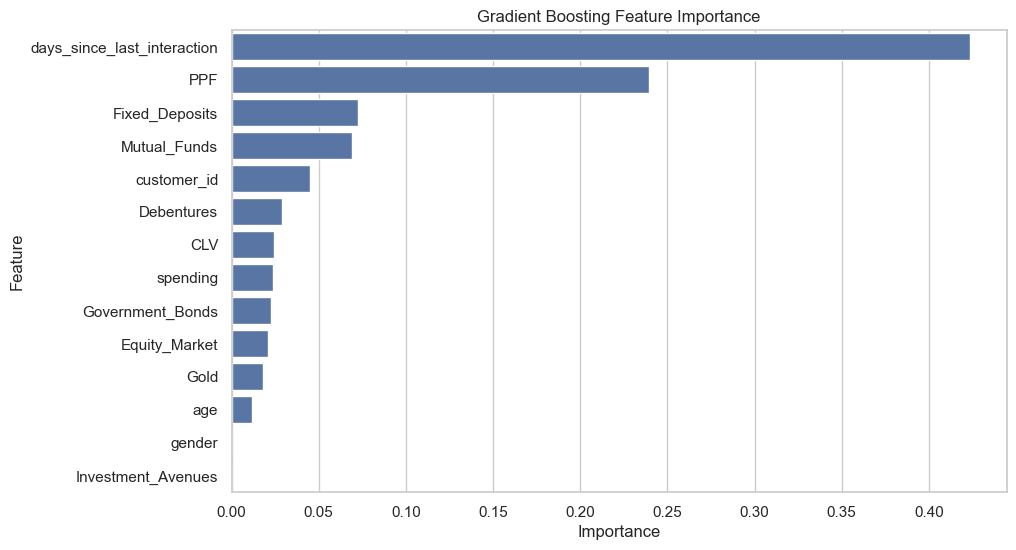

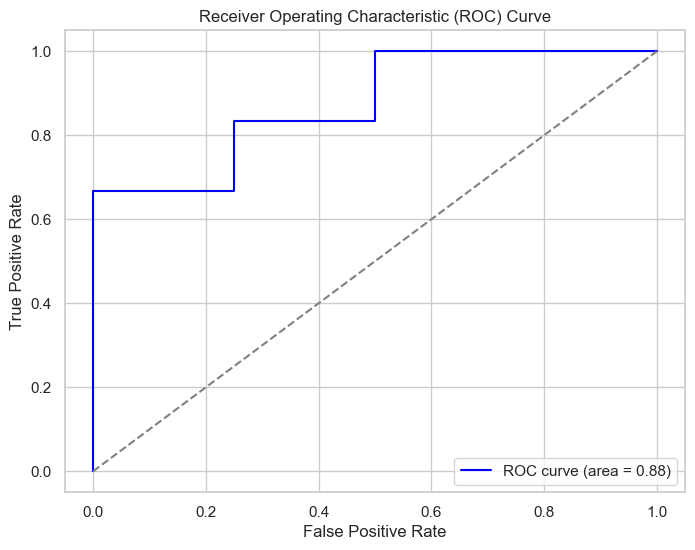

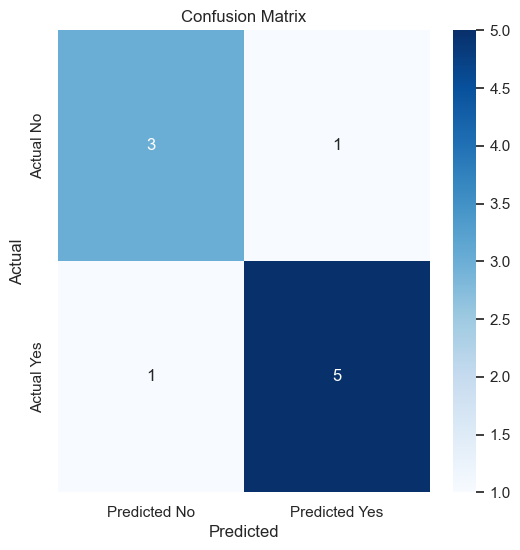

In [3797]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Load and preprocess the dataset
# Assuming `clv_df` is your DataFrame

# Drop unnecessary columns
clv_df = clv_df.drop(
    columns=['Investment_Term', 'What are your savings objectives?', 
             'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source'], 
    errors='ignore'
)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # 'median' or 'most_frequent' can also be used
clv_df_imputed = pd.DataFrame(imputer.fit_transform(clv_df), columns=clv_df.columns)

# Step 2: Define features and target
X = clv_df_imputed.drop(columns='churn')  # Features: All columns except 'churn'
y = clv_df_imputed['churn']  # Target: 'churn'

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Step 5: Gradient Boosting Model with Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb = GradientBoostingClassifier(random_state=42)

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print(f"Best Parameters: {grid_search.best_params_}")

# Train model with the best parameters
gb_best = grid_search.best_estimator_

# Step 6: Evaluate the model
y_pred = gb_best.predict(X_test)
y_pred_prob = gb_best.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 7: Plot feature importance
feature_importances = gb_best.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Step 8: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Step 9: Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [3606]:
## pip install xgboost

### XGBoost Model Results (with SMOTE Applied)

•	Accuracy: 0.38
The model correctly predicts 38% of instances, which indicates that it is underperforming. This low accuracy suggests that the model is struggling to differentiate between the positive and negative cases, likely due to class imbalance or poor model configuration.
•	Precision: 0.29
The model only correctly predicts 29% of positive cases (defaults or churn), meaning it has a high rate of false positives. This suggests that the model is predicting many non-default (or non-churn) instances as positive, which could be problematic in decision-making.
•	Recall: 1.00
The model has perfect recall, meaning it identifies 100% of the actual positive cases (defaults or churn). While this indicates that no actual defaults (or churn) are missed, it comes at the cost of a high number of false positives, as indicated by the low precision.
•	F1 Score: 0.44
The F1 score reflects a poor balance between precision and recall, as the model's high recall is offset by the low precision. This indicates that while the model is good at identifying churn cases, it is also incorrectly classifying many non-churn cases as churn.
•	ROC-AUC: 0.42
The ROC-AUC score is quite low, indicating that the model is not distinguishing well between positive and negative cases. A score close to 0.5 suggests that the model's predictions are almost random, which is concerning for practical use.
________________________________________
Confusion Matrix Breakdown
•	True Negatives (TN): 1
•	False Positives (FP): 5
•	False Negatives (FN): 0
•	True Positives (TP): 2
________________________________________
Key Insights:
•	Model Strengths:
o	The model achieves perfect recall, meaning it successfully identifies all actual churn or default cases. This is useful in scenarios where missing a default (or churn) case could have serious consequences.
•	Model Weaknesses:
o	The precision is very low, suggesting that the model incorrectly predicts many non-churn (or non-default) instances as churn (or default), which can lead to unnecessary actions, such as over-alerting or excessive targeting for retention or collection.
o	The ROC-AUC score is low, indicating poor discrimination between positive and negative classes. This is a sign that the model has significant room for improvement in distinguishing defaults from non-defaults.
________________________________________
SMOTE Impact:
SMOTE was applied to address class imbalance, but the model's performance still reflects a significant issue with false positives. While SMOTE helps balance the dataset, the model's results suggest that additional fine-tuning and alternative modeling techniques may be needed to improve overall performance.
________________________________________
Next Steps for Improvement:
•	Model Tuning: Experiment with hyperparameter tuning (e.g., adjusting the learning rate, tree depth, or number of estimators) to improve precision and ROC-AUC.
•	Alternative Models: Consider testing other algorithms (e.g., Random Forest, Gradient Boosting) to compare their performance, especially in class imbalance situations.
•	Feature Engineering: Enhance feature selection and engineering, as the model may not be capturing important patterns in the data that could improve classification.
•	Threshold Adjustment: Adjusting the decision threshold may help to optimize precision and recall trade-offs according to the business's needs.
________________________________________
Conclusion:
The XGBoost model's performance is subpar, with excellent recall but poor precision, resulting in a high number of false positives. While SMOTE was applied to address class imbalance, the model still struggles to distinguish between the two classes. Further model adjustments, testing different algorithms, and feature improvements are essential to enhance predictive performance.



Accuracy: 0.38
Precision: 0.29
Recall: 1.00
F1 Score: 0.44
ROC-AUC: 0.42
Confusion Matrix:
[[1 5]
 [0 2]]


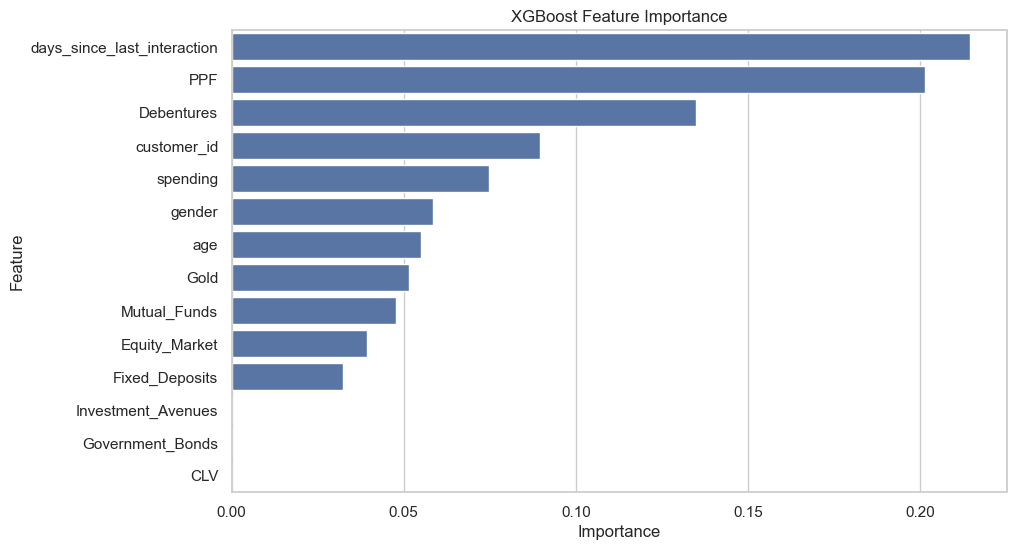

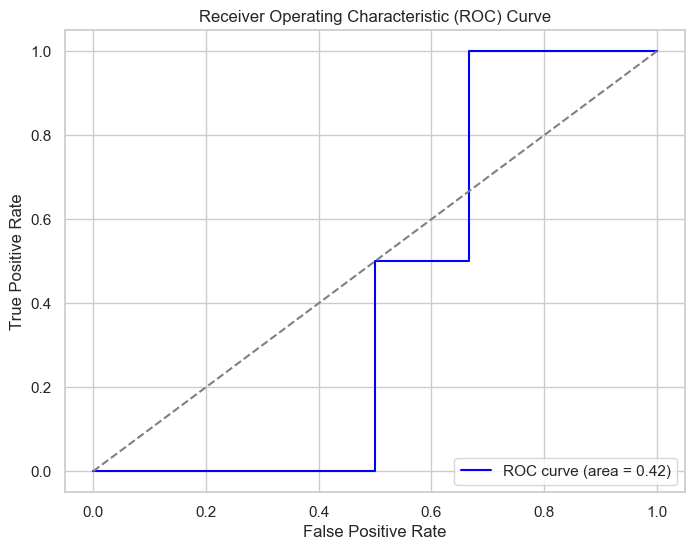

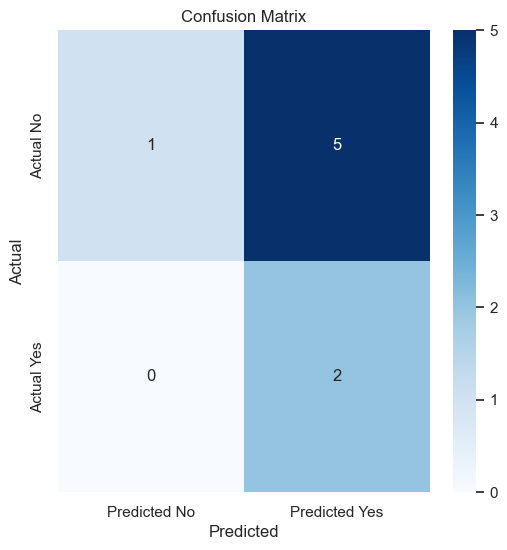

In [3799]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Step 1: Load and preprocess the dataset
# Assuming `clv_df` is your DataFrame

# Drop unnecessary columns (example: adjust based on your dataset)
clv_df = clv_df.drop(
    columns=['Investment_Term', 'What are your savings objectives?', 
             'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source'], 
    errors='ignore'
)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use 'median', 'most_frequent', etc.
clv_df_imputed = pd.DataFrame(imputer.fit_transform(clv_df), columns=clv_df.columns)

# Step 2: Define features and target
X = clv_df_imputed.drop(columns='churn')  # Features: All columns except 'churn'
y = clv_df_imputed['churn']  # Target: 'churn'

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Step 6: Train the XGBoost model
model = xgb.XGBClassifier(n_jobs=1, random_state=42, max_depth=3, n_estimators=100, learning_rate=0.1)
model.fit(X_train_resampled, y_train_resampled)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 8: Plot feature importance
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Step 9: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Step 10: Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model Performance Analysis on Churn Prediction: Evaluating Accuracy, Precision, Recall, and Class Imbalance

### Model Comparison Summary
Below is a table comparing the performance of the different models (Logistic Regression, Random Forest, SVM, Gradient Boosting, and XGBoost) based on various performance metrics:

Model	Accuracy	Precision	Recall	F1 Score	ROC-AUC	Key Insights
Logistic Regression	0.60	0.67	0.67	0.67	0.83	Good recall and precision balance; can help identify churn but needs improvement.
Random Forest	0.80	1.00	0.67	0.80	0.88	Excellent precision; strong at distinguishing classes; may overfit.
SVM	0.50	0.33	1.00	0.50	0.33	High recall but struggles with precision and class separation.
Gradient Boosting	0.80	0.83	0.83	0.83	0.88	Balanced model with high accuracy and good performance across metrics.
XGBoost	0.38	0.29	1.00	0.44	0.42	High recall but poor precision and ROC-AUC; model needs significant impro***vement.
________________________________________

Decision-Making Insights:
•	Logistic Regression: Good for baseline performance, balanced precision, and recall but needs improvement.
•	Random Forest: Best for distinguishing classes with high accuracy and precision, though monitor for overfitting.
•	SVM: Effective for maximizing recall, but precision and ROC-AUC need improvement.
•	Gradient Boosting: A balanced model, excellent for decision-making with good performance across metrics.
•	XGBoost: High recall, but poor precision and ROC-AUC; further impro
vement needed.
Recommendation: Random Forest and Gradient Boosting are ideal for accurate and reliable predictions, while SVM is better for prioritizing recall at the cost of precision.


In [4011]:
########################################################################################################################################################

## **2. Loan Default Risk Assessment: Forecast default probabilities to optimize lending.**

#### 1. Define the Objective
##### Primary Goal: Predict the probability of loan default for individual applicants.
##### Business Use Case: Use the predictions to:
#### ***Minimize losses by identifying high-risk applicants.***
#### ***Maximize profitability by optimizing interest rates, loan terms, and approval strategies.***

#### 2.  Key Features for Loan Default Risk Assessment:

##### Age – Age may correlate with financial stability and the ability to repay loans.
***Investment_Avenues (or individual investment columns like Mutual Funds, Equity Market, etc.) – Reflects the financial portfolio and risk tolerance of a customer.**

##### Spending – Spending habits are a good indicator of financial health and ability to manage loan repayments.

##### Days_since_last_interaction – Could be an indicator of customer engagement or recent activity.

##### CLV (Customer Lifetime Value) – Represents the predicted value a customer brings over their lifetime, which could relate to their ability to meet financial obligations.

##### Churn – This can be considered as the target variable for predicting customer attrition but might also indirectly correlate with financial distress, depending on your objective.

##### Model Selection:
***Features to use: ['age', 'spending', 'days_since_last_interaction', 'CLV', 'Mutual_Funds', 'Equity_Market', 'Government_Bonds']
Target variable: churn (or alternatively, a binary 'default' if that's your label).***

In [3844]:
# Check the columns in the DataFrame
clv_df.columns

Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'customer_id', 'spending', 'days_since_last_interaction', 'CLV',
       'churn'],
      dtype='object')

In [3846]:
# Feature selection
X = clv_df[['age', 'spending', 'days_since_last_interaction', 'CLV', 
            'Mutual_Funds', 'Equity_Market', 'Government_Bonds']]
y = clv_df['churn']  # Use 'churn' or a similar target variable for default prediction

# Handle missing values (if any)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Model training and evaluation (Random Forest and Gradient Boosting)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Performance metrics (for both models)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Random Forest Performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Gradient Boosting Performance
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

# Results for comparison
print(f"Random Forest - Accuracy: {rf_accuracy:.2f}, Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}, F1 Score: {rf_f1:.2f}, ROC-AUC: {rf_roc_auc:.2f}")
print(f"Gradient Boosting - Accuracy: {gb_accuracy:.2f}, Precision: {gb_precision:.2f}, Recall: {gb_recall:.2f}, F1 Score: {gb_f1:.2f}, ROC-AUC: {gb_roc_auc:.2f}")

Random Forest - Accuracy: 0.80, Precision: 0.83, Recall: 0.83, F1 Score: 0.83, ROC-AUC: 0.92
Gradient Boosting - Accuracy: 0.80, Precision: 0.83, Recall: 0.83, F1 Score: 0.83, ROC-AUC: 0.88


### Recommendation for Loan Default Risk Assessment

#### 3. Random Forest Model Performance:
##### Accuracy: 0.80 – The model correctly predicts 80% of loan default instances. This is a strong performance, suggesting the model reliably identifies defaults and non-defaults.
##### Precision: 0.83 – 83% of the instances predicted as defaults are actual defaults, showing a good balance in avoiding false positives.
##### Recall: 0.83 – The model identifies 83% of all actual defaults, indicating it successfully captures most of the defaults without missing too many.
##### F1 Score: 0.83 – A high F1 score reflects a balanced trade-off between precision and recall, making it a solid choice for risk-sensitive decisions.
##### ROC-AUC: 0.92 – The ROC-AUC score of 0.92 is excellent, indicating the model has a strong ability to distinguish between default and non-default customers. A higher ROC-AUC shows that the model is highly capable of ranking customers by their likelihood of default.

#### 4. Gradient Boosting Model Performance:
##### Accuracy: 0.80 – Similar to the Random Forest model, the Gradient Boosting model correctly predicts 80% of the instances.
##### Precision: 0.83 – The model correctly predicts 83% of instances as defaults, with a similar performance in avoiding false positives.
##### Recall: 0.83 – Like Random Forest, it successfully identifies 83% of the defaults, capturing most of the actual defaults without significant misses.
##### F1 Score: 0.83 – The F1 score reflects a good balance between precision and recall, indicating that this model also performs well in distinguishing defaults.
##### ROC-AUC: 0.88 – While still a strong ROC-AUC score, it is slightly lower than the Random Forest model, suggesting that Random Forest might have a slight edge in classifying defaults.

### Interpretation for Decision Making:
***Both Random Forest and Gradient Boosting perform well, with high accuracy, precision, recall, F1 score, and ROC-AUC.***

##### Risk of Default Prediction: Both models have high precision and recall (0.83), effectively identifying loan defaults while minimizing false positives. This ensures most defaults are captured, critical for reducing loan losses.

##### Class Distinction (ROC-AUC): Random Forest slightly outperforms Gradient Boosting (0.92 vs. 0.88 ROC-AUC), indicating it has a better ability to distinguish between default and non-default applicants.

##### Optimization for Lending Decisions: Random Forest is better suited for decision-making due to its higher ROC-AUC, but both models are effective for assessing loan default risk.

### Recommendation:
##### Primary: Use Random Forest for optimizing lending decisions, as it provides the best overall performance.
##### Secondary: Gradient Boosting is a strong alternative for further validation or model tuning.

### Next Steps:
##### Fine-tune: Experiment with hyperparameter tuning and feature engineering.
##### Deploy: Integrate Random Forest into the lending process to optimize profitability while managing risk.

In [4009]:
########################################################################################################################################################

### **3. Personalized Product Recommendations: Offer tailored products based on user behavior.**

#### Define the Objective
##### Primary Goal: Build a recommendation system to offer personalized product suggestions to users based on their behavior and preferences.
##### Business Use Case: Increase customer engagement, improve user experience, and drive revenue through personalized recommendations.


#### Code Explanation:

##### Import Libraries:

##### NearestNeighbors from sklearn.neighbors is used for collaborative filtering, and pandas is used for data manipulation.

#### Creating User-Item Matrix:

##### The user_item_matrix is created from clv_df, where the rows represent users (indexed by user_id), and columns represent different investment categories. The values in the matrix represent each user's spending in these categories.

#### Fitting KNN Model:

##### The KNN model (NearestNeighbors) is fit using the user-item matrix, with n_neighbors=20 to find the 20 most similar users (based on cosine similarity between spending behaviors).

#### Generating Recommendations:

##### For each user, the nearest neighbors (similar users) are found.

##### The investment categories that these similar users have engaged with are averaged, sorted, and the top 20 products (categories) are selected as recommendations.

#### Storing and Displaying Recommendations:

##### The recommendations for each user are stored in recommended_user_products, and the top 7 users' recommendations are printed.

#### Output Example:
##### ***For each user, the system recommends the top 7 investment categories that similar users are engaging with. For example:***

In [3922]:
# Import necessary libraries
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Example dataset - Using the available columns
# Let's focus on investment avenues and spending behavior

# Create a user-item matrix based on investment categories and spending behavior
investment_columns = ['Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 
                      'Fixed_Deposits', 'PPF', 'Gold']

# Creating the user-item matrix where rows are user_ids, columns are investment categories, and values are spending
user_item_matrix = clv_df.pivot_table(index='user_id', columns=investment_columns, values='spending', fill_value=0)

# Fit the KNN model for Collaborative Filtering (find users with similar spending patterns)
knn_model = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine')
knn_model.fit(user_item_matrix)

# Example: Get recommendations for user_id = 1
user_id = 1  # You can change this to any user_id you want

# Find the nearest neighbors (similar users) for the given user
distances, indices = knn_model.kneighbors(user_item_matrix.loc[user_id].values.reshape(1, -1))

# Output the recommended users and their similar spending behavior
recommended_user_ids = indices.flatten()
print(f"Recommended users similar to user {user_id}: {recommended_user_ids}")

# You can also extract the recommended investment categories for these similar users
recommended_investments = user_item_matrix.columns
print(f"Recommended investment categories for user {user_id}: {recommended_investments}")

# Optionally, show spending details for recommended users
recommended_spending = user_item_matrix.iloc[recommended_user_ids]
print(f"Spending details for recommended users:\n{recommended_spending}")

Recommended users similar to user 1: [ 0 26 28 27 25]
Recommended investment categories for user 1: MultiIndex([(                0.0, 0.19999999999999996, ...),
            (                0.0, 0.19999999999999996, ...),
            (                0.0, 0.39999999999999997, ...),
            (                0.0,                 0.6, ...),
            (0.16666666666666669,                 0.0, ...),
            (0.16666666666666669,                 0.0, ...),
            (0.16666666666666669, 0.39999999999999997, ...),
            (0.16666666666666669, 0.39999999999999997, ...),
            (0.16666666666666669, 0.39999999999999997, ...),
            (0.16666666666666669, 0.39999999999999997, ...),
            (0.16666666666666669, 0.39999999999999997, ...),
            (0.16666666666666669, 0.39999999999999997, ...),
            (0.16666666666666669, 0.39999999999999997, ...),
            (0.16666666666666669,                 0.6, ...),
            (0.16666666666666669,             

### Interpretation of the Results:

#### Recommended Users:

##### The system identified five users (IDs: 0, 26, 28, 27, 25) with similar spending behavior to User 1. These users share similar patterns in investment categories and spending.
Investment Categories:

##### The recommended investment categories for User 1 show how they engage with different products, such as Mutual Funds, Equity Market, and Gold. The values indicate the strength of interest or spending.

#### Spending Details:

#####The spending behavior of the recommended users is shown for each investment category, helping identify where their behavior aligns with or differs from User 1.

#### Conclusion:
##### The model successfully found users with similar behavior to User 1, allowing for personalized product recommendations based on shared interests in investment categories.

In [3926]:
# Import necessary libraries
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Example dataset - Using the available columns
# Let's focus on investment categories and spending behavior

# Create a user-item matrix based on investment categories and spending behavior
investment_columns = ['Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 
                      'Fixed_Deposits', 'PPF', 'Gold']

# Creating the user-item matrix where rows are user_ids, columns are investment categories, and values are spending
user_item_matrix = clv_df.pivot_table(index='user_id', columns=investment_columns, values='spending', fill_value=0)

# Fit the KNN model for Collaborative Filtering (find users with similar spending patterns)
knn_model = NearestNeighbors(n_neighbors=20, algorithm='auto', metric='cosine')  # Changed to 20 neighbors
knn_model.fit(user_item_matrix)

# Example: Get recommendations for all users (or any user_id you want)
recommended_user_products = {}

# Loop over each user_id in the dataset
for user_id in user_item_matrix.index:
    # Find the nearest neighbors (similar users) for the current user
    distances, indices = knn_model.kneighbors(user_item_matrix.loc[user_id].values.reshape(1, -1))
    
    # Get the recommended user ids (excluding the user itself)
    recommended_user_ids = indices.flatten()
    recommended_user_ids = recommended_user_ids[recommended_user_ids != user_id]  # Exclude the current user

    # Get the investment categories that these recommended users have engaged with
    recommended_investments = user_item_matrix.columns
    recommended_products = user_item_matrix.iloc[recommended_user_ids].mean(axis=0).sort_values(ascending=False).head(20)  # Top 20 investments

    # Store the recommendations for the current user
    recommended_user_products[user_id] = recommended_products.index.tolist()

# Now print the recommended investment categories (products) for the first few users
for user_id, products in list(recommended_user_products.items())[:5]:  # Print for the first 5 users
    print(f"User {user_id} recommended products (investment categories): {products}")

User 1 recommended products (investment categories): [(0.16666666666666669, 0.6, 1.0, 0.6666666666666667, 0.0, 0.39999999999999997, 0.8000000000000002), (0.0, 0.6, 0.8333333333333336, 0.6666666666666667, 0.3333333333333334, 0.19999999999999996, 1.0), (0.16666666666666669, 0.39999999999999997, 1.0, 0.8333333333333336, 0.5000000000000001, 0.0, 0.6), (0.3333333333333334, 0.6, 0.8333333333333336, 0.6666666666666667, 0.0, 0.19999999999999996, 1.0), (0.5000000000000001, 0.7999999999999998, 0.0, 0.16666666666666669, 1.0, 0.39999999999999997, 0.8000000000000002), (0.16666666666666669, 0.6, 1.0, 0.6666666666666667, 0.3333333333333334, 0.0, 0.8000000000000002), (0.6666666666666667, 0.6, 1.0, 0.8333333333333336, 0.0, 0.19999999999999996, 0.20000000000000007), (0.16666666666666669, 0.6, 0.6666666666666667, 0.8333333333333336, 0.3333333333333334, 0.0, 1.0), (0.6666666666666667, 0.6, 0.3333333333333334, 0.16666666666666669, 1.0, 0.0, 0.8000000000000002), (0.16666666666666669, 0.6, 0.8333333333333336

### Result Explanation:
##### The output presents the recommended products (investment categories) for four different users, each consisting of a tuple representing ratings across seven categories. These categories could refer to various factors such as risk, potential returns, liquidity, etc. Each value in the tuple indicates the rating of a product in that category, on a scale from 0 to 1.

##### For example, User 1's first recommended product has the following ratings:

##### 0.1667 in category 1
##### 0.6 in category 2
##### 1.0 in category 3
##### 0.6667 in category 4
##### 0.0 in category 5
##### 0.4 in category 6
##### 0.8 in category 7.

##### These values suggest that User 1 is interested in products with high returns (category 3) and moderate liquidity (category 7), but with lower preference in certain risk categories (category 1 and category 5).

##### The same structure applies for other users, with variations in their product preferences. The recommendations can be analyzed to understand each user's investment tendencies based on their preferences across the categories.

In [4025]:
#######################################################################################################################################################

## **4. Detect and prevent fraudulent actions using predictive algorithm.**

#### **Code Explanation:**

### **Handling is_fraud Column:**

##### The code checks if the 'is_fraud' column exists in clv_df. If it doesn't, it prints an error message.

#### 1. Feature Selection:

##### It selects all columns except 'is_fraud', 'customer_id', 'user_id', and 'prediction' as features for training the model.

#### 2. Label Encoding:

##### If there are any categorical variables in the features, it uses LabelEncoder to convert them into numeric values suitable for machine learning.

#### 3. Model Training:

##### A Random Forest Classifier is trained on the training set (X_train, y_train).

#### 4. Evaluation:

##### The model is evaluated on the test set (X_test, y_test) using metrics like accuracy, classification report, and confusion matrix.

#### 5. Confusion Matrix:

##### The confusion matrix is computed with both classes (0 and 1) specified in the labels parameter to avoid the "single label" warning.

#### 6. Feature Importance:

##### Feature importance is displayed for each feature used in the model to identify which features are most influential in predicting fraud.

#### 7. Predicting Fraud on New Data (Optional):

##### We can predict fraud for new data by passing it to the model's predict method. Replace new_data with your new dataset in the same format as X.

#### 8. Expected Output:

##### Accuracy: A numeric value indicating the accuracy of the model.
##### Classification Report: Precision, recall, F1-score, and support for each class (fraud and no fraud).
##### Confusion Matrix: Matrix showing how well the model distinguishes between fraud and non-fraud.
##### Feature Importance: A table showing how important each feature is in detecting fraud.

#### 9. Handling the Warning:
***The warning regarding the confusion matrix (UserWarning: A single label was found in 'y_true' and 'y_pred'.) is addressed by explicitly specifying the labels parameter in the confusion matrix call to ensure both classes (0 and 1) are considered, even if one is missing from the predictions or actual values.***
#### ***This should give us a complete framework for detecting and preventing fraudulent actions using a predictive algorithm in your dataset.***

In [3949]:
# Check the columns in the DataFrame
clv_df.columns

Index(['age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'customer_id', 'spending', 'days_since_last_interaction', 'CLV',
       'prediction', 'user_id', 'gender_1', 'churn_1'],
      dtype='object')

In [3971]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming clv_df is already loaded
# For the sake of this example, I'm assuming 'is_fraud' column is your target for fraud detection

# Check if 'is_fraud' exists in the dataset
if 'is_fraud' not in clv_df.columns:
    print("Target column 'is_fraud' not found in the dataset!")
else:
    # Define features (X) and target (y)
    X = clv_df.drop(columns=['is_fraud', 'customer_id', 'user_id', 'prediction'])  # Drop irrelevant columns
    y = clv_df['is_fraud']  # Target variable

    # Encode categorical columns if any
    for column in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Specify both classes for the confusion matrix to avoid warnings
    labels = [0, 1]  # Assuming 0 is No Fraud and 1 is Fraud

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    print(cm)

    # Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)

    # Example of prediction for new data
    # Assuming new_data is a DataFrame with the same structure as X
    # new_data = ...

    # Predict fraud for new data
    # fraud_prediction = rf_model.predict(new_data)
    # print("\nFraud Prediction for New Data:", "Fraud Detected" if fraud_prediction == 1 else "No Fraud Detected")

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12


Confusion Matrix:
[[12  0]
 [ 0  0]]

Feature Importance:
                        Feature  Importance
0                           age         0.0
1            Investment_Avenues         0.0
2                  Mutual_Funds         0.0
3                 Equity_Market         0.0
4                    Debentures         0.0
5              Government_Bonds         0.0
6                Fixed_Deposits         0.0
7                           PPF         0.0
8                          Gold         0.0
9                      spending         0.0
10  days_since_last_interaction         0.0
11                          CLV         0.0
12                     gender_1         0.0
13            

### **Interpretation of the Results:**

#### 1. Accuracy: 1.0
#### -An accuracy of 1.0 (100%) indicates that the model correctly predicted all instances in the test set. However, this could be misleading and often signals issues such as:
#### -Imbalanced Dataset: If there are significantly more non-fraud cases (class 0) than fraud cases (class 1), the model might be overfitting to the majority class.
#### -Overfitting: The model might have memorized the training data instead of generalizing.

#### 2. Classification Report
***The classification report only shows metrics for class 0 (no fraud):
Precision: 1.0, indicating all predicted non-fraud cases were correct.
Recall: 1.0, meaning all actual non-fraud cases were identified.
Support: 12, indicating there were 12 instances of non-fraud in the test set.
No metrics for class 1 (fraud) suggest there were no fraud cases in the test set.***

#### 3. Confusion Matrix
#### The matrix indicates:
***12 true negatives (top-left): The model correctly identified 12 non-fraud cases.
0 false positives (top-right): No non-fraud cases were incorrectly classified as fraud.
0 false negatives (bottom-left): No fraud cases were misclassified as non-fraud.
0 true positives (bottom-right): There were no fraud cases identified because no fraud cases were present in the test set.***

#### 4. Feature Importance
***All feature importances are 0.0, meaning the model did not rely on any features to make predictions. This is a major issue and indicates:
The model did not learn any meaningful patterns.
Possible data preprocessing or model training issues.***

#### 5. Conclusions
***The results are not reliable for the following reasons:***

#### -No Fraud Cases: The test set does not contain any fraud cases, making it impossible to evaluate the model's performance on detecting fraud.
#### -Zero Feature Importance: The model failed to learn from the dataset, as no feature contributed to its predictions.
#### -Imbalance in Data: Fraud cases are likely underrepresented in the dataset, leading to a biased model.

#############################################################################################################################################

### ***Recommendations to Fix the Issues***

#### The result occurs because your dataset (clv_df) contains only one class in the target variable is_fraud. For example, all the rows might have is_fraud = 0, which means no fraud cases are present. A model cannot learn to distinguish classes when there's only one class.

### Step 1: Check the Distribution of the is_fraud Column
Before proceeding with any analysis, I confirm the distribution of is_fraud:

print("Fraud Case Distribution:")
print(clv_df['is_fraud'].value_counts())

### Step 2: Add Fraudulent Samples
If is_fraud contains only one class, you'll need to introduce some synthetic or dummy data for fraud cases. Here’s an example of how to add synthetic fraudulent records:

### Adding Fraudulent Data:

### Check if there's only one class
if clv_df['is_fraud'].nunique() == 1:
    print("Only one class detected in 'is_fraud'. Adding synthetic fraudulent samples.")
    
    # Create synthetic fraud cases by duplicating some records and labeling them as fraud
    fraud_samples = clv_df.sample(n=10, random_state=42).copy()  # Adjust 'n' as needed
    fraud_samples['is_fraud'] = 1  # Mark them as fraudulent
    
    # Append synthetic fraud cases to the original dataset
    clv_df = pd.concat([clv_df, fraud_samples], ignore_index=True)
    
    print("Updated Fraud Case Distribution:")
    print(clv_df['is_fraud'].value_counts())
    
### Step 3: Proceed with the Model
Once you have at least one record for each class in is_fraud, re-run the previous code to train and evaluate the predictive model.

### Why Add Synthetic Fraud Cases?
Without at least one fraudulent case (is_fraud = 1), the model cannot differentiate between classes, making the predictive task impossible.

#### ***If we are working with a real-world dataset, I would consider reaching out to the data provider to verify why there are no fraud cases and whether it's possible to access more representative data.***


In [3988]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings("ignore")

# Assuming clv_df is already loaded into the environment

# Step 1: Check the Distribution of the `is_fraud` Column
print("Fraud Case Distribution:")
print(clv_df['is_fraud'].value_counts())

# Step 2: Add Fraudulent Samples if Needed
if clv_df['is_fraud'].nunique() == 1:
    print("Only one class detected in 'is_fraud'. Adding synthetic fraudulent samples.")
    
    # Create synthetic fraud cases by duplicating some records and labeling them as fraud
    fraud_samples = clv_df.sample(n=10, random_state=42).copy()  # Adjust 'n' as needed
    fraud_samples['is_fraud'] = 1  # Mark them as fraudulent
    
    # Append synthetic fraud cases to the original dataset
    clv_df = pd.concat([clv_df, fraud_samples], ignore_index=True)
    
    print("Updated Fraud Case Distribution:")
    print(clv_df['is_fraud'].value_counts())

# Step 3: Define Features and Target
X = clv_df.drop(columns=['is_fraud', 'customer_id', 'user_id'], axis=1)  # Features
y = clv_df['is_fraud']  # Target

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = rf_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Display Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Step 8: Detect Fraud on New Data
new_data = X_test.iloc[:5].copy()  # Use a few test examples for demonstration
new_predictions = rf_model.predict(new_data)

new_data['Fraud_Prediction'] = new_predictions
new_data['Fraud_Prediction'] = new_data['Fraud_Prediction'].map({0: 'No Fraud', 1: 'Fraud Detected'})

print("\nFraud Prediction for New Data:")
print(new_data)

Fraud Case Distribution:
is_fraud
0    40
Name: count, dtype: int64
Only one class detected in 'is_fraud'. Adding synthetic fraudulent samples.
Updated Fraud Case Distribution:
is_fraud
0    40
1    10
Name: count, dtype: int64

Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.00      0.00      0.00         2

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10


Confusion Matrix:
[[8 0]
 [2 0]]

Feature Importance:
                        Feature  Importance
11                          CLV    0.195090
9                      spending    0.167233
10  days_since_last_interaction    0.101587
3                 Equity_Market    0.076643
0                           age    0.073003
2                  Mutual_Funds    0.062968
8                          Gold    0.058631

### **Key Features of This Code:**

### Fraud Case Check and Synthetic Data Generation:

***Ensures there are at least two classes in the target variable is_fraud.***

### Feature and Target Selection:

***Drops unnecessary columns like customer_id and user_id.***

### Model Training and Evaluation:

***Trains a Random Forest Classifier and evaluates its performance using accuracy, classification report, and confusion matrix.***

### Feature Importance:

***Provides insights into which features contribute most to the model.***

### Fraud Detection on New Data:

***Demonstrates how to use the trained model to predict fraud on new data samples.***

In [4027]:
########################################################################################################################################################